In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def diff_eqn_josh():
    return 1/(L*m)*(
        k1*v[-1]*dt**3
        -z[-1]*(-3*L*m+R*m*dt)
        -z[-2]*(3*L*m-2*R*m-k2*L*dt**2)
        -z[-3]*(L*m+R*m*dt+k2*L*dt**2-k2*R*dt**3)
    )

def diff_eqn_ever():
    # i(t+dt) = dt*v(t)/L + i(t) - R*i(t)*dt/L
    # z(t+2dt) = dt**2/m*(2*K*i_0*i(t)/z_0**2 - 2*K*i_0**2 * z(t)/z_0**3) + 2z(t+dt) - z(t)
    i_list.append(dt*v[-1]/L + i_list[-1] - R*i_list[-1]*dt/L)
    z_next = dt**2/m*(2*K*i_0*i_list[-2]/z_0**2 - 2*K*i_0**2 * z[-2]/z_0**3) + 2*z[-1] - z[-2]
    if z_next > 0:
        z_next = 0
    elif z_next < - 0.20:
        z_next = - 0.20
#     try:
#         print("Magnetic Force: ", K*i_list[-1]**2/z_next**2, " | Gravity: ", m*9.8)
#     except:
#         print("Magnet stuck on the coil")
    return z_next

def PID_josh(Kp=1, Ki=1, Kd=1):
    return (v[-1] 
            + Kd*(e[-1]-2*e[-2]+e[-3])/dt
            + Kp*(e[-2]-e[-3])
            + Ki*e[-3]*dt
           )

def diff_eqn_nonlinear():
    if z_n[-1] != 0.0:
#         print("z_n[-1] != 0.0")
        z_dotdot.append( ((K/m) * (i_list[-1]**2) / (z_n[-1]**2)) - g )
        # z_dotdot.append( - g )
#         print("z_dotdot: ", z_dotdot[-1])
        z_dot.append( z_dotdot[-1]*dt + z_dot[-1])
#         print("z_dot: ", z_dot[-1])
        z_next = z_dot[-1]*dt + z_n[-1]
#         print("_ z_next: ", z_next)
        if z_next > 0:
            z_next = 0
        elif z_next < - 0.20:
            z_next = - 0.20
#         print("z_next: ", z_next)
    else:
#         print("z_n[-1] == 0.0")
        z_next = 0.0
    return z_next


In [38]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
g = 9.8 # m/s^2
K = m*g*z_0**2/i_0**2 # chosen the normalization constant given the equilibrium condition
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

print(K*i_0**2/z_0**2,m*9.8)
K*i_0**2/z_0**2 == m*9.8

0.6664000000000001 0.6664000000000001


True

In [39]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
g = 9.8 # m/s^2
K = m*g*z_0**2/i_0**2 #constant
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

In [40]:
z = [z_0, z_0, z_0]
z_n = [z_0, z_0, z_0]
z_dot = [0.0]
z_dotdot = []
t = [0, dt, 2*dt]
for i in range(500):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())
    z_n.append(diff_eqn_nonlinear())

In [41]:
%matplotlib inline

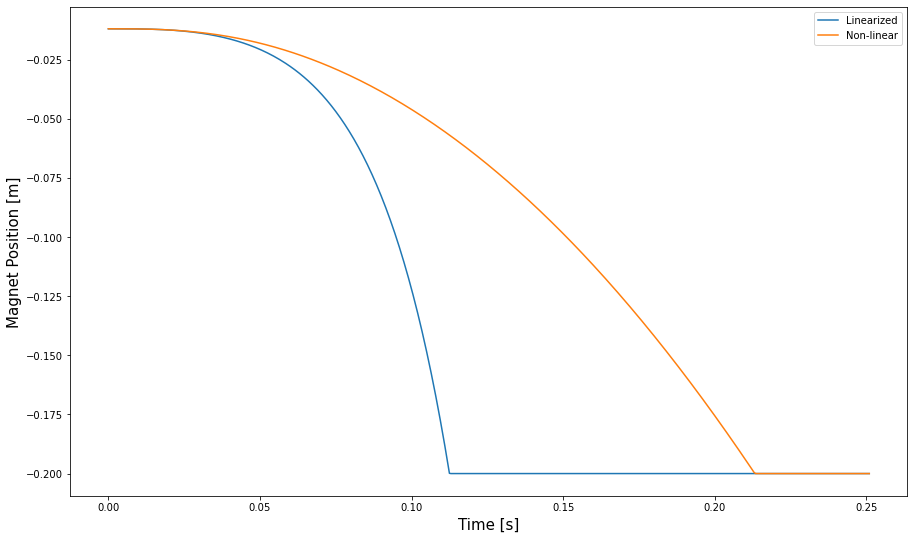

In [42]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(t, z, label="Linearized")
ax.plot(t, z_n, label="Non-linear")
ax.set_xlabel("Time [s]", size=15)
ax.set_ylabel("Magnet Position [m]", size=15)
ax.legend()

# Sticking to the Coil

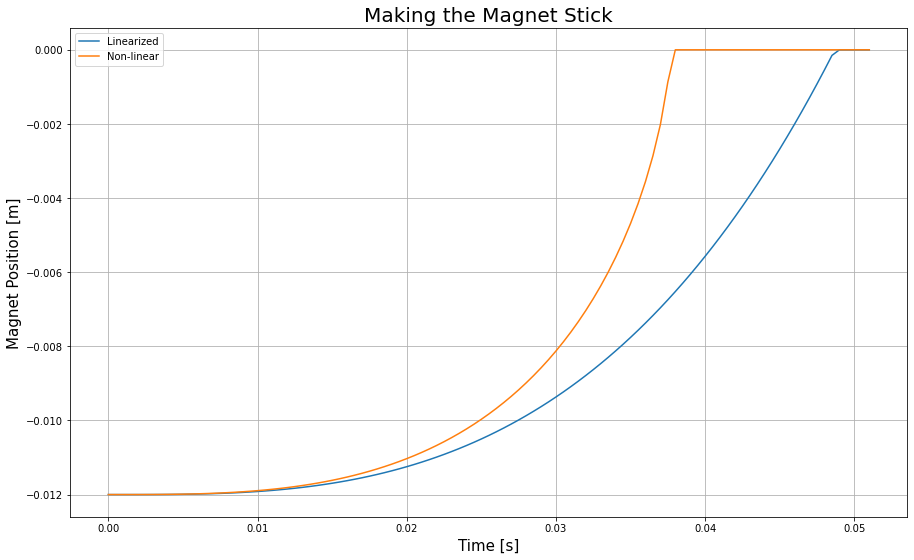

In [54]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
K = m*g*z_0**2/i_0**2 #constant
k1 = 1 # electrical constant
k2 = 1 # positional constant
v = [20] # Drive voltage (V)
i_list = [i_0, i_0, i_0]

z = [z_0, z_0, z_0]
z_n = [z_0, z_0, z_0]
z_dot = [0.0]
z_dotdot = []
t = [0, dt, 2*dt]
for i in range(100):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())
    z_n.append(diff_eqn_nonlinear())
    
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(t, z, label="Linearized")
ax.plot(t, z_n, label="Non-linear")
ax.set_xlabel("Time [s]", size=15)
ax.set_ylabel("Magnet Position [m]", size=15)
ax.set_title("Making the Magnet Stick", size=20)
ax.legend()
ax.grid()

## Dropping to the ground

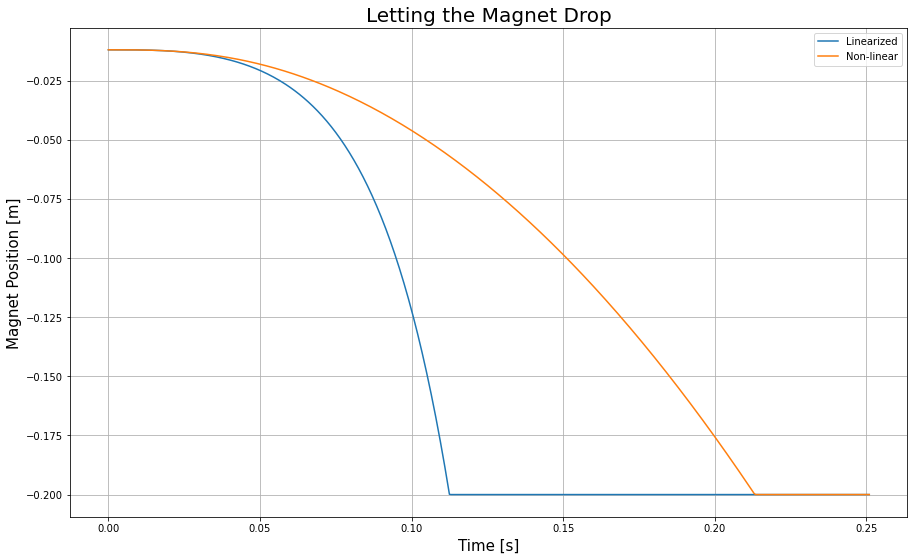

In [52]:
# Parameters
L = 0.4125 # coil inductance (Henry)
m = 0.068 # magnet mass (kg)
R = 10 # coil resistance (Ohm)
dt = 0.0005 # Time step (s)
i_0 = 0.8 # steady current
z_0 = -0.012 # steady pos
K = m*g*z_0**2/i_0**2 #constant
k1 = 1 # electrical constant
k2 = 1 # positional constant
v = [0] # Drive voltage (V)
i_list = [i_0, i_0, i_0]
z = [z_0, z_0, z_0] # position array

z = [z_0, z_0, z_0]
z_n = [z_0, z_0, z_0]
z_dot = [0.0]
z_dotdot = []
t = [0, dt, 2*dt]
for i in range(500):
    t.append((3+i)*dt)
    z.append(diff_eqn_ever())
    z_n.append(diff_eqn_nonlinear())
    
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(t, z, label="Linearized")
ax.plot(t, z_n, label="Non-linear")
ax.set_xlabel("Time [s]", size=15)
ax.set_ylabel("Magnet Position [m]", size=15)
ax.set_title("Letting the Magnet Drop", size=20)
ax.legend()
ax.grid()